In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split
from sklearn.feature_selection import chi2,f_classif,SelectKBest,VarianceThreshold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [7]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline(connected=True)

In [6]:
data= pd.read_csv('Wine.csv')

In [9]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [11]:
data.shape

(178, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [13]:
round(data.describe(),1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9,1.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9,0.8
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0,1.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5,1.0
50%,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5,2.0
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0,3.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0,3.0


In [14]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [15]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
Customer_Segment          3
dtype: int64

In [18]:
datframe = pd.DataFrame({'Dtypes':data.dtypes,'Duplicated':data.duplicated().sum(),'UNique':data.nunique(),'Null_values':data.isnull().sum()})

In [19]:
datframe

,Dtypes,Duplicated,UNique,Null_values
Alcohol,float64,0,126,0
Malic_Acid,float64,0,133,0
Ash,float64,0,79,0
Ash_Alcanity,float64,0,63,0
Magnesium,int64,0,53,0
Total_Phenols,float64,0,97,0
Flavanoids,float64,0,132,0
Nonflavanoid_Phenols,float64,0,39,0
Proanthocyanins,float64,0,101,0
Color_Intensity,float64,0,132,0


## EDA

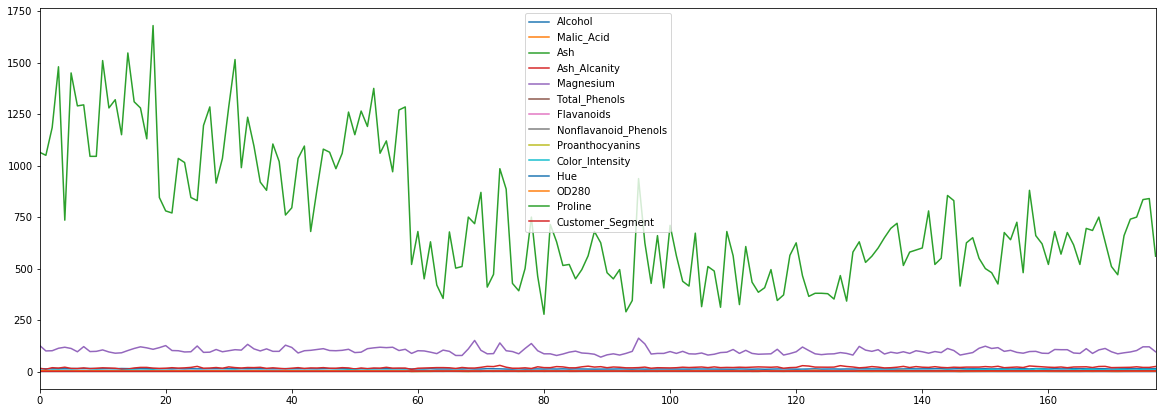

In [22]:
fig,ax=plt.subplots(figsize=(20,7))
data.plot(ax=ax)
plt.show()

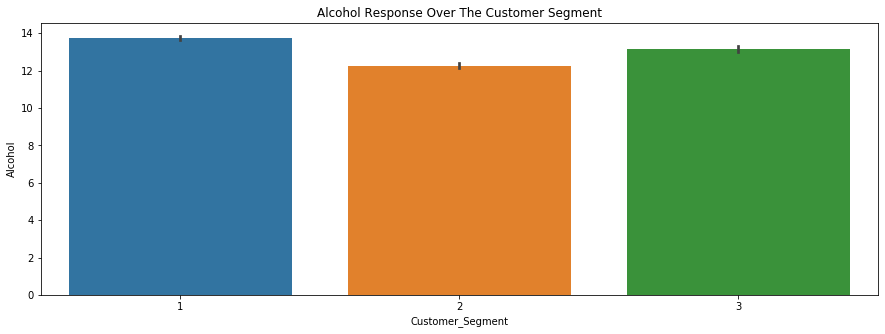

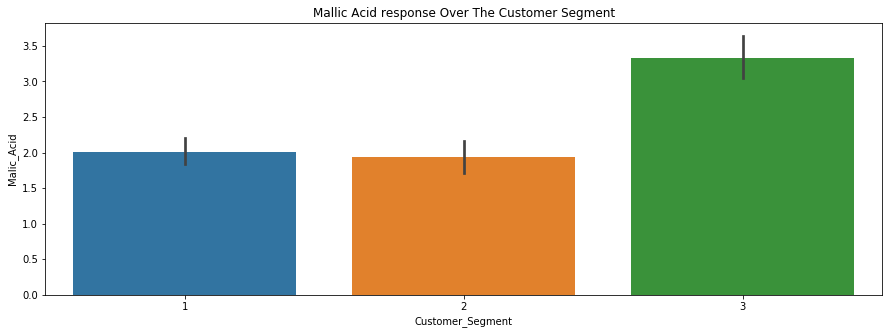

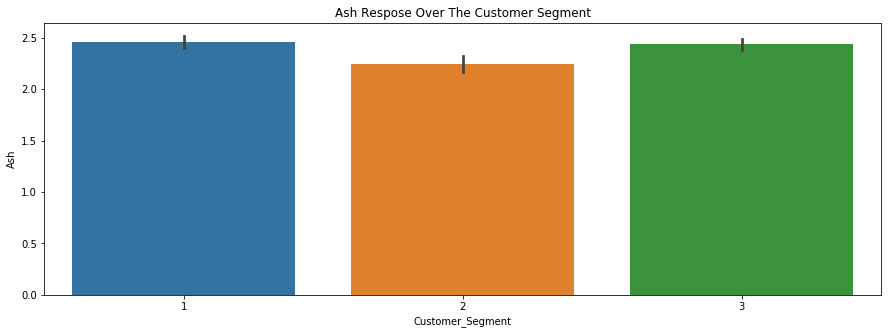

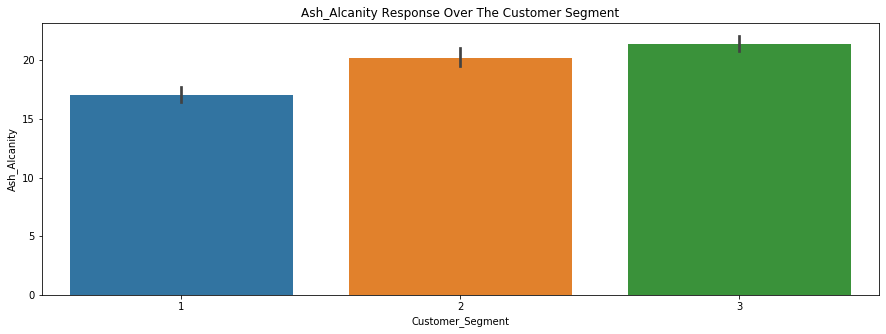

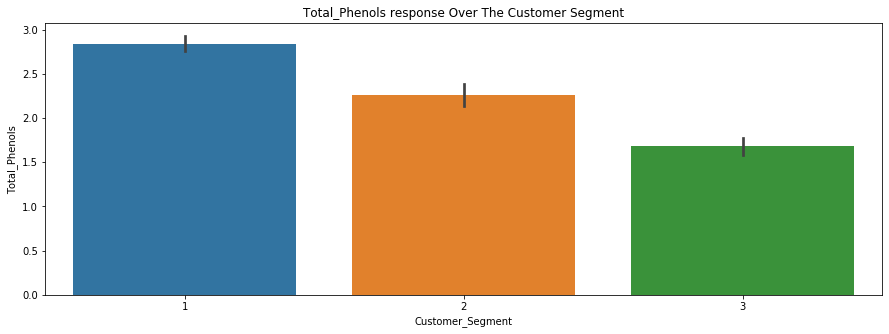

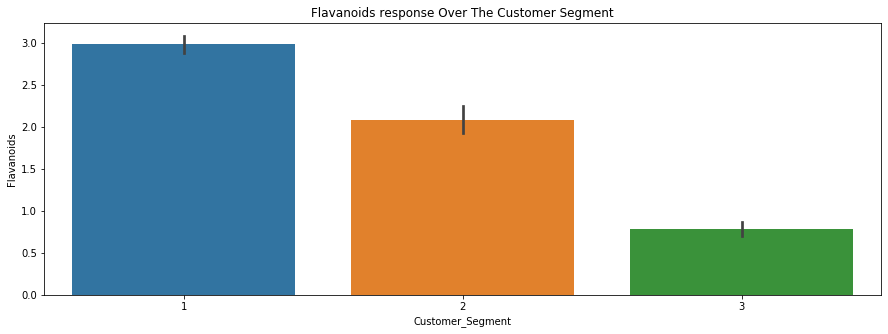

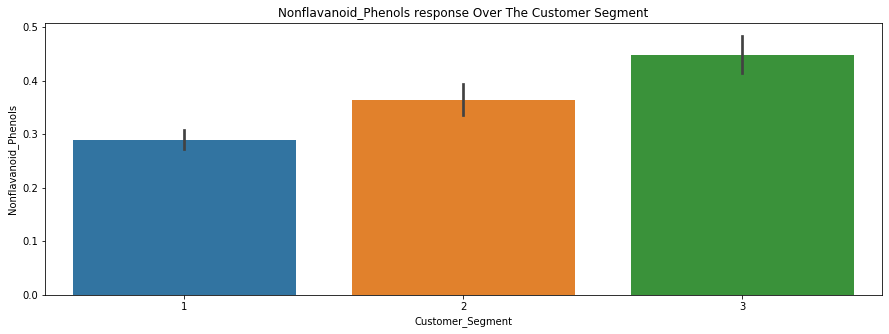

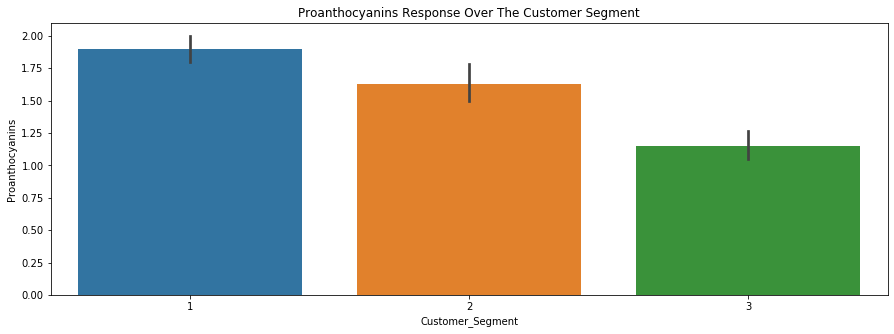

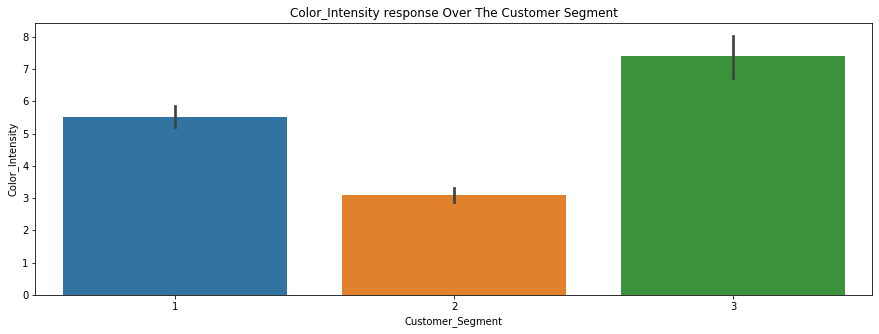

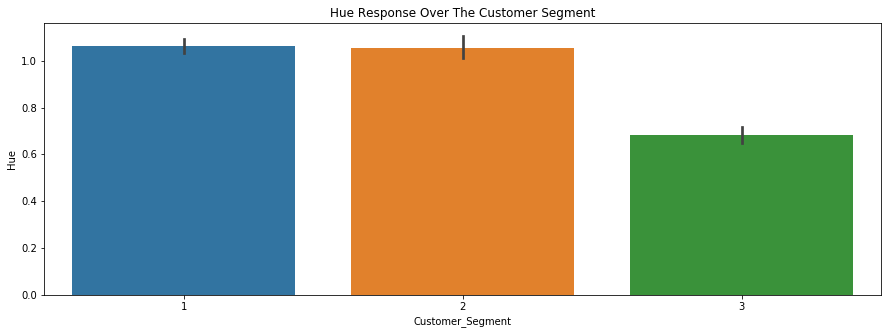

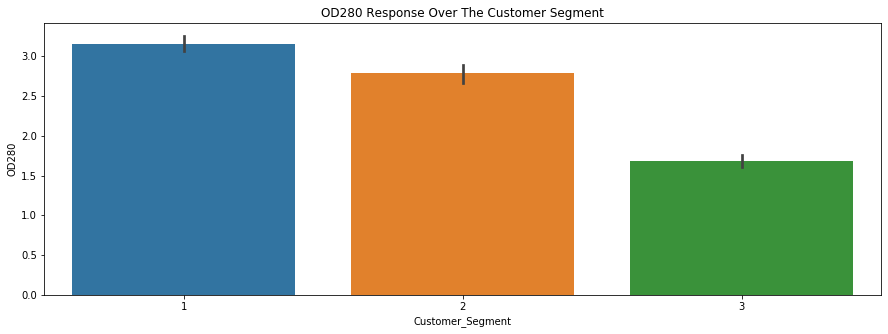

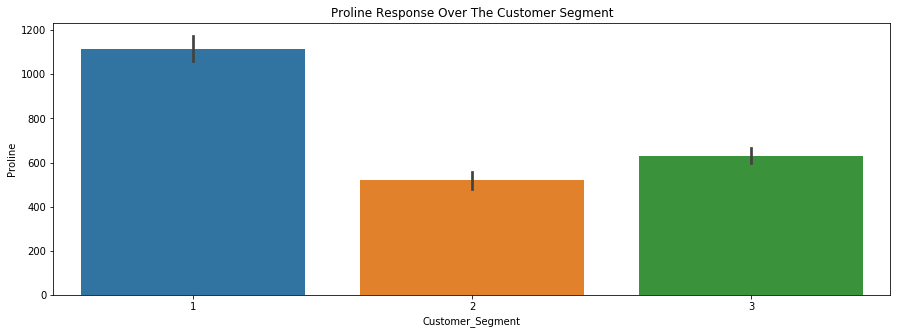

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(y=data['Alcohol'],x=data['Customer_Segment'])
plt.title('Alcohol Response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Malic_Acid'],x=data['Customer_Segment'])
plt.title('Mallic Acid response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Ash'],x=data['Customer_Segment'])
plt.title('Ash Respose Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Ash_Alcanity'],x=data['Customer_Segment'])
plt.title('Ash_Alcanity Response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Total_Phenols'],x=data['Customer_Segment'])
plt.title('Total_Phenols response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Flavanoids'],x=data['Customer_Segment'])
plt.title('Flavanoids response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Nonflavanoid_Phenols'],x=data['Customer_Segment'])
plt.title('Nonflavanoid_Phenols response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Proanthocyanins'],x=data['Customer_Segment'])
plt.title('Proanthocyanins Response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Color_Intensity'],x=data['Customer_Segment'])
plt.title('Color_Intensity response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Hue'],x=data['Customer_Segment'])
plt.title('Hue Response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['OD280'],x=data['Customer_Segment'])
plt.title('OD280 Response Over The Customer Segment')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(y=data['Proline'],x=data['Customer_Segment'])
plt.title('Proline Response Over The Customer Segment')
plt.show()

### Start to Data Processing And Feature Engineering.

In [26]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [27]:
x = data.drop(columns=['Customer_Segment'])
y = data['Customer_Segment']

In [28]:
x.shape,y.shape

((178, 13), (178,))

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [30]:
x_train.shape,x_test.shape

((142, 13), (36, 13))

In [36]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [39]:
f_score,p_values=f_classif(x_train_scalled,y_train)

In [40]:
P_values = pd.Series(p_values,index=x_train.columns)

In [41]:
P_values.sort_values(ascending=False,inplace=True)

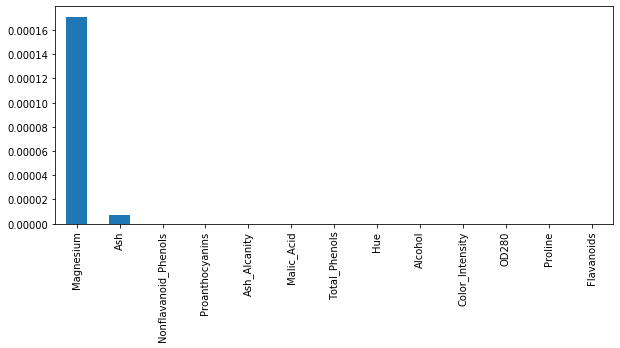

In [42]:
plt.figure(figsize=(10,4))
P_values.plot(kind='bar')
plt.show()

In [43]:
sel = SelectKBest(f_classif,k=11)

In [44]:
sel.fit(x_train_scalled,y_train)

SelectKBest(k=11, score_func=<function f_classif at 0x0DE89348>)

In [46]:
features = x_train.columns[sel.get_support()]
features

Index(['Alcohol', 'Malic_Acid', 'Ash_Alcanity', 'Total_Phenols', 'Flavanoids',
       'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue',
       'OD280', 'Proline'],
      dtype='object')

In [50]:
X_train = sel.transform(x_train_scalled)
X_test   = sel.transform(x_test_scalled)

In [51]:
X_train.shape,X_test.shape

((142, 11), (36, 11))

In [55]:
print('Y_train with 1 :-',len(y_train[y_train==1]))
print('Y_train with 2 :-',len(y_train[y_train==2]))
print('Y_train with 3 :-',len(y_train[y_train==3]))

Y_train with 1 :- 47
Y_train with 2 :- 57
Y_train with 3 :- 38


### By Hyperparameter Tunning

In [56]:
estimator = DecisionTreeClassifier()

In [86]:
from scipy.stats import randint

In [90]:
params = {'criterion':['gini','entropy'],'min_samples_leaf':randint(1,4)}

In [91]:
clf_cv = RandomizedSearchCV(estimator,params,random_state=42,cv=10)

In [92]:
clf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [93]:
clf_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
clf_cv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1}

In [95]:
clf_cv.predict(X_test)

array([1, 2, 1, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 3, 3, 3], dtype=int64)

In [97]:
clf_cv.best_score_

0.9438095238095239

### By Traditional Method 

In [98]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuarcy :-',accuracy_score(y_test,y_pred))

Accuarcy :- 1.0


In [99]:
print('accuaracy with the training data :-',clf.score(X_train,y_train))
print('accuaracy with the testing data :-',clf.score(X_test,y_test))

accuaracy with the training data :- 1.0
accuaracy with the testing data :- 1.0


### Classification Report And Confusion Metrics

In [105]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

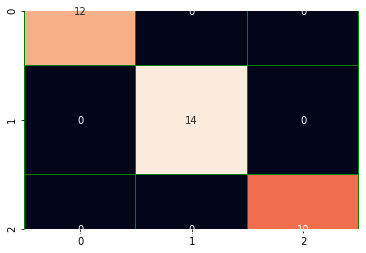

In [113]:
plt.figure(figsize=(6,4))
sns.heatmap(mat,annot=True,vmin=0.9,linewidths=0.4,linecolor='green',fmt='d',cbar=False)
plt.show()

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [116]:
dataframe = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataframe.head()

,Actual,Predicted
10,1,1
134,3,3
28,1,1
121,2,2
62,2,2


## Thank You